In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding

from keras.datasets import mnist

np.random.seed(10)

Using TensorFlow backend.


In [6]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

print("\t[Info] train data={:7,}".format(len(X_train_image)))  
print("\t[Info] test  data={:7,}".format(len(X_test_image))) 

print("\t[Info] Shape of train data=%s" % (str(X_train_image.shape)))
print("\t[Info] Shape of train label=%s" % (str(y_train_label.shape)))

	[Info] train data= 60,000
	[Info] test  data= 10,000
	[Info] Shape of train data=(60000, 28, 28)
	[Info] Shape of train label=(60000,)


In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示
    plt.show()

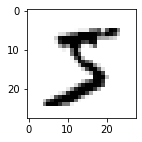

5

In [9]:
plot_image(X_train_image[0])

y_train_label[0]

In [10]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()

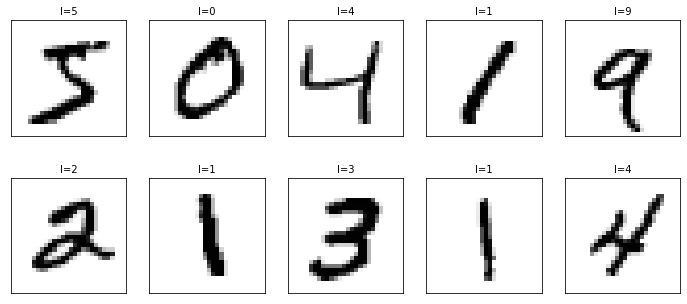

In [11]:
plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)


In [12]:
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')
print("\t[Info] xTrain: %s" % (str(x_Train.shape)))
print("\t[Info] xTest: %s" % (str(x_Test.shape)))
  
# Normalization
x_Train_norm = x_Train/255
x_Test_norm = x_Test/255

	[Info] xTrain: (60000, 784)
	[Info] xTest: (10000, 784)


In [13]:
y_TrainOneHot = np_utils.to_categorical(y_train_label) # 將 training 的 label 進行 one-hot encoding
y_TestOneHot = np_utils.to_categorical(y_test_label) # 將測試的 labels 進行 one-hot encoding

y_train_label[0] # 檢視 training labels 第一個 label 的值
y_TrainOneHot[:1] # 檢視第一個 label 在 one-hot encoding 後的結果, 會在第六個位置上為 1, 其他位置上為 0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")

	[Info] Model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________



In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=20, 
                          batch_size=200, 
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0854 - val_accuracy: 0.9773
Epoch 2/20
 - 1s - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0832 - val_accuracy: 0.9794
Epoch 3/20
 - 1s - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0833 - val_accuracy: 0.9793
Epoch 4/20
 - 1s - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0849 - val_accuracy: 0.9796
Epoch 5/20
 - 1s - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0895 - val_accuracy: 0.9782
Epoch 6/20
 - 2s - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0881 - val_accuracy: 0.9788
Epoch 7/20
 - 1s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9787
Epoch 8/20
 - 1s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9796
Epoch 9/20
 - 1s - loss: 9.7444e-04 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9789
Epoch 10/20
 - 1s - loss: 8.2046e-04 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9788
Epoch 11/20

In [17]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

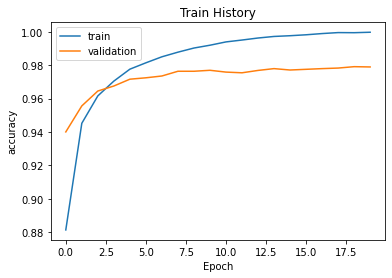

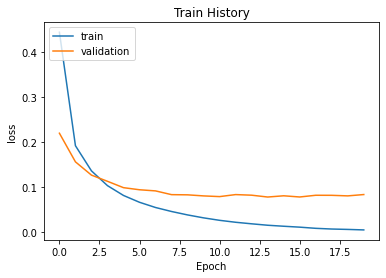

In [19]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')


In [20]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 47us/step

	[Info] Accuracy of testing data = 97.9%


	[Info] Making prediction to x_Test_norm
	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



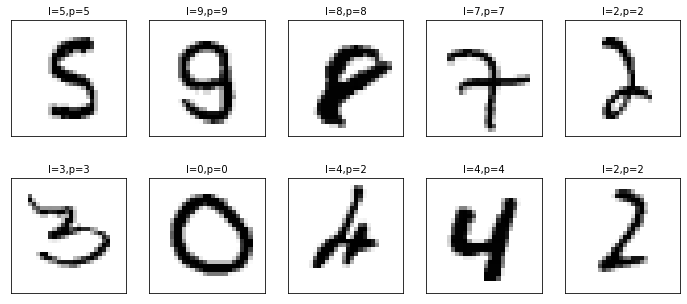

In [24]:
print("\t[Info] Making prediction to x_Test_norm")  
prediction = model.predict_classes(x_Test_norm)  # Making prediction and save result to prediction  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)

In [25]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)